In [1]:
cd

C:\Users\56961


In [2]:
cd Desktop\portafolio

C:\Users\56961\Desktop\portafolio


In [3]:
get_ipython().magic('reset -sf')

C:\Users\56961\AppData\Local\Temp\ipykernel_22224\3674724974.py:1: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  get_ipython().magic('reset -sf')


In [4]:

# cargar librerias
from scipy import stats



# definir librerias
import random
import numpy as np
import pandas as pd

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import networkx as nx
import pickle 
from collections import Counter
import csv

import networkx.algorithms.isomorphism as iso

import scipy.io as sio
import numpy as np
from datetime import datetime

import seaborn as sns
import pandas as pd
import numpy as np
import io

import warnings
warnings.filterwarnings('ignore', '.*do not.*', )
warnings.warn('DelftStack')
warnings.warn('Do not show this message')
import warnings
warnings.filterwarnings('ignore')


C:\Users\56961\AppData\Local\Temp\ipykernel_22224\1572372819.py:33: UserWarning: DelftStack
  warnings.warn('DelftStack')


# Cargar  data frame con los resultados de la experimentación.

In [5]:
name_df="data frame/df_resumen_exp_reales"
file = open(name_df, 'rb')
df_experimentacion= pickle.load(file)
file.close()

df_experimentacion['Num_metodo_est'] = df_experimentacion['Num_metodo_est'].replace("PIMPLE", "PIMLE")
df_experimentacion['Num_metodo_est'] = df_experimentacion['Num_metodo_est'].replace("EMV", "MLE")
df_experimentacion

df_experimentacion.head(2)

,Id_sample,Etiqueta H,Tipo_sample_p_gral,Porc_nodos_muestra,Num_metodo_est,Valor_Estimado,Valor_error(Exac - Est),Valor_error_rel(Exac - Est)
0,0,views<=520,5,0.01,PIMLE,17457.068133,-942.068133,-0.057043
1,0,views<=520,5,0.01,MLE,17314.057061,-799.057061,-0.048384


In [40]:
def graficar_sample_vs_ER_summarize(df_grupo,Tipo_sample_p_gral,L_met_est,size_figure,l_xlim,l_ylim,act_legend, LabelGrupo):
    #l_color=[27, 79, 114 ,40, 116, 166 ,46, 134, 193 ,133, 193, 233,230, 176, 170,217, 136, 128 ,169, 50, 38,100, 30, 22 ]
    #l_color=[254, 0, 0,254, 58, 0, 23, 0, 254,20, 90, 50 ,112, 123, 124]
    
    #vec_color=np.array(l_color)/255
    #l_colores=[]
    #for j in range(int(len(l_color)/3)):
    #    l_colores.append(tuple(vec_color[j*3:j*3+3]))
    
    dict_NumGraph_to_Index={u:v for u,v in zip(list(range(0,4)), [(0,0),(0,1),(1,0),(1,1)])}
    
    size_sample=0.1
    cond=df_grupo["Porc_nodos_muestra"]==size_sample
    df_size=df_grupo[cond]
    
    cant_colums=len(Tipo_sample_p_gral)
    dict_num_colum_to__type_sample={u:v for u,v in zip(range(cant_colums),Tipo_sample_p_gral)}

    cant_graficas=len(L_met_est)
    dict_num_grafica_to_est={u:v for u,v in zip(range(cant_graficas),L_met_est)}
    #Lalfa=[0.5,0.5,0.95,0.95,0.95]
    Lalfa=[0.5,0.5,1,1,1]    
    dict_met_to_alfa={u:v for u,v in zip(L_met_est,Lalfa)}

    fig, axes = plt.subplots(2,2, figsize=size_figure, sharex=False, sharey=False)    
    fig.suptitle("Aproximación densidad error relativo ("+LabelGrupo+ ").")
    
    for num_col in range(cant_colums):     # L_met_est
        met_sample=dict_num_colum_to__type_sample[num_col]
        cond_1=df_size["Tipo_sample_p_gral"]==met_sample  # num_col ok
        df_col=df_size[cond_1]
        #print(num_row,num_col)

        for grafica_i in range(cant_graficas): # L_prop_sample

            metodo_est=dict_num_grafica_to_est[grafica_i]
            cond_3=df_col["Num_metodo_est"]==metodo_est  # grafica_i
            df_datos=df_col[cond_3]
            
            PAlfa=dict_met_to_alfa[metodo_est]
            datos_i=list(df_datos["Valor_error_rel(Exac - Est)"])
            label_name=metodo_est+"."
            f,c=dict_NumGraph_to_Index[num_col]
            #sns.kdeplot(datos_i,bw=0.3, label=label_name, lw=1.5,log_scale=False,alpha=PAlfa,ax=axes[num_col],color=l_colores[grafica_i])
            sns.kdeplot(datos_i,bw=0.3, label=label_name, lw=1.5,log_scale=False,alpha=PAlfa,ax=axes[f,c])
            
            #linea
            if "RDS_I"==metodo_est:
                line = axes[f,c].get_lines()[-1]# Obtén la línea del gráfico actual
                line.set_linestyle(":")# Cambia el estilo de la línea a punteado

            axes[f,c].set_ylim(l_ylim)
            axes[f,c].set_xlim(l_xlim)            
            axes[f,c].grid(True)
            

        xlabel="Error relativo"
        axes[f,c].set_xlabel(xlabel,fontsize=10) 
        ylabel="Dens. Error relativo."
        axes[f,c].set_ylabel(ylabel,fontsize=10)      
        titulo="Err. rel v/s muestra tipo "+str(met_sample)+"."
        axes[f,c].set_title(titulo,fontsize=10) 
        
        if act_legend:
            #axes[num_col].legend(loc='upper right',fontsize=6, title ='Tipo de método:', framealpha=0.5)
            axes[f,c].legend(loc='upper right',fontsize=9, framealpha=0.5)            
            #axes[num_col].legend.get_frame().set_alpha(0.7)  # Ajustar la transparencia del cuadro de la leyenda
#            for text in legend.get_texts():
#                text.set_alpha(0.7)  # Ajustar la transparencia del texto de las etiquetas de la leyenda
    plt.tight_layout()                            

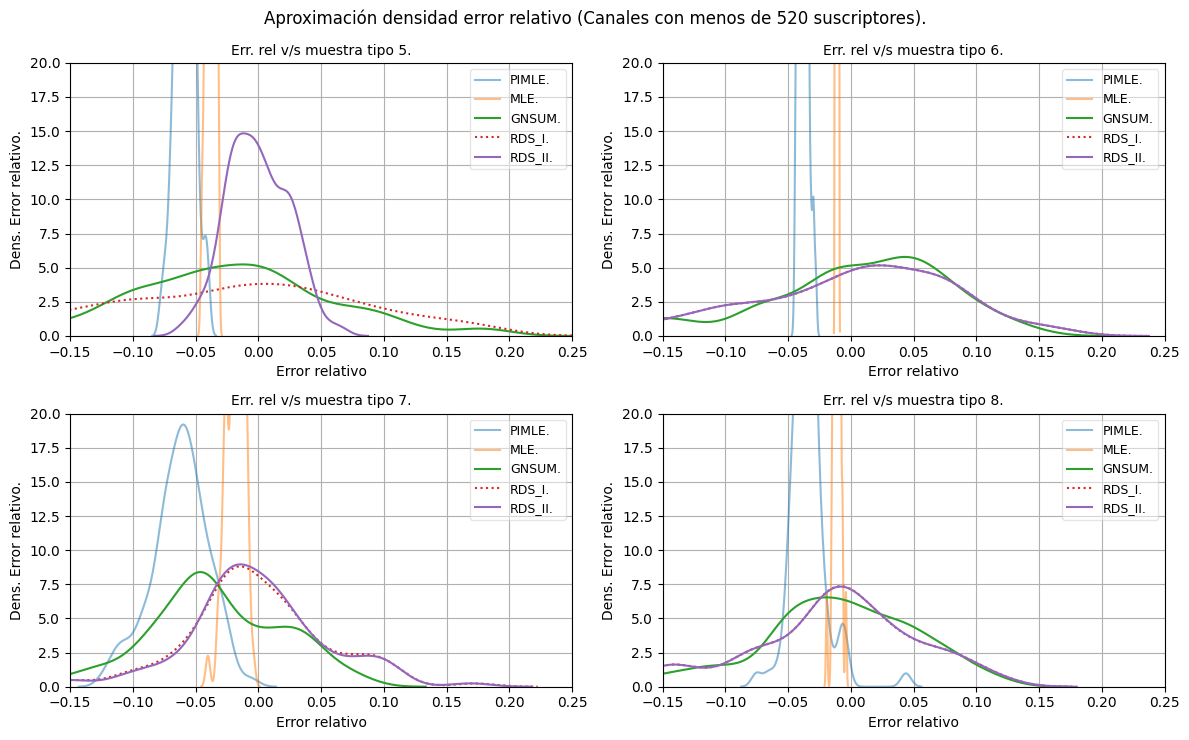

In [41]:
size_figure=(12,15/2) # variable 3
Tipo_sample_p_gral=['5','6','7','8'] # variable 1
L_met_est=["PIMLE", "MLE","GNSUM","RDS_I","RDS_II"] # variable 2

LabelGrupo="Canales con menos de 520 suscriptores"

delta=0.05
l_ylim=[0,20]
l_xlim=[-0.2+delta,0.2+delta]
act_legend=True

l_grupos=list(df_experimentacion["Etiqueta H"].unique())
i=0
grupo_i=l_grupos[i]
cond_grupo=df_experimentacion["Etiqueta H"]==grupo_i
df_grupo=df_experimentacion[cond_grupo]
graficar_sample_vs_ER_summarize(df_grupo,Tipo_sample_p_gral,L_met_est,size_figure,l_xlim,l_ylim,act_legend, LabelGrupo)

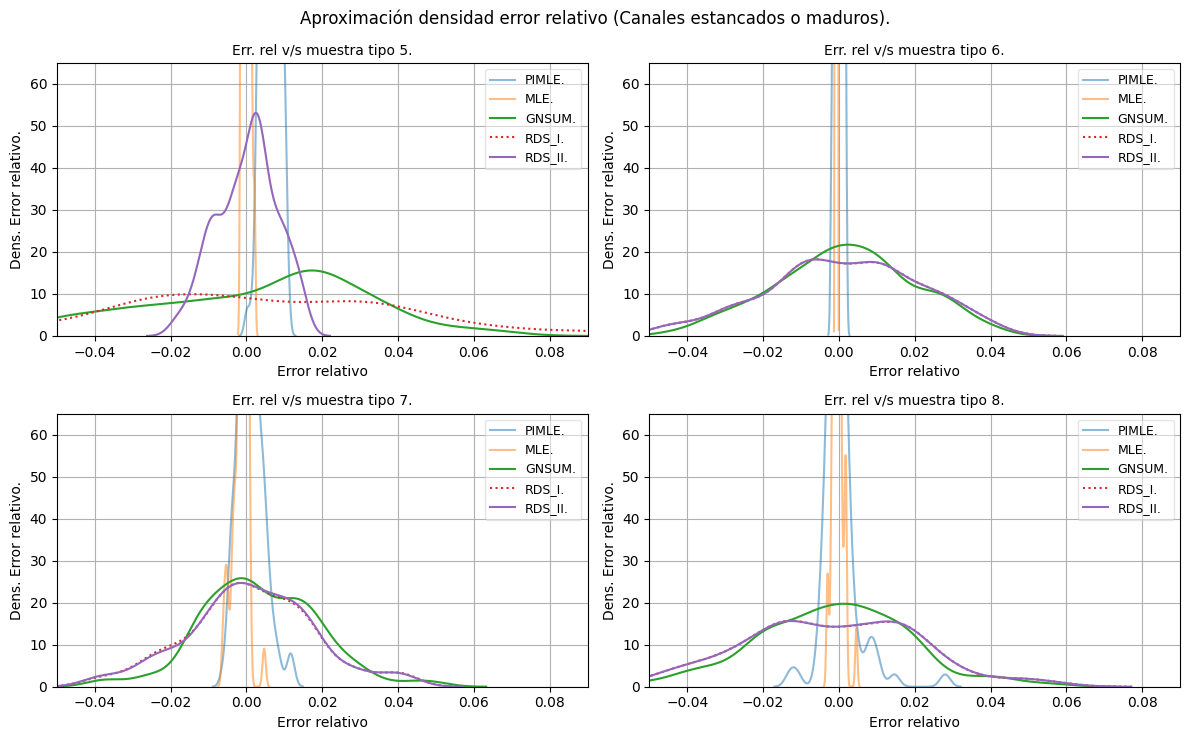

In [44]:
size_figure=(12,15/2) # variable 3
Tipo_sample_p_gral=['5','6','7','8'] # variable 1
L_met_est=["PIMLE", "MLE","GNSUM","RDS_I","RDS_II"] # variable 2
LabelGrupo="Canales estancados o maduros"

delta=0.02
l_ylim=[0,65]
l_xlim=[-0.07+delta,0.07+delta]
act_legend=True

l_grupos=list(df_experimentacion["Etiqueta H"].unique())
i=1
grupo_i=l_grupos[i]
cond_grupo=df_experimentacion["Etiqueta H"]==grupo_i
df_grupo=df_experimentacion[cond_grupo]
graficar_sample_vs_ER_summarize(df_grupo,Tipo_sample_p_gral,L_met_est,size_figure,l_xlim,l_ylim,act_legend, LabelGrupo)

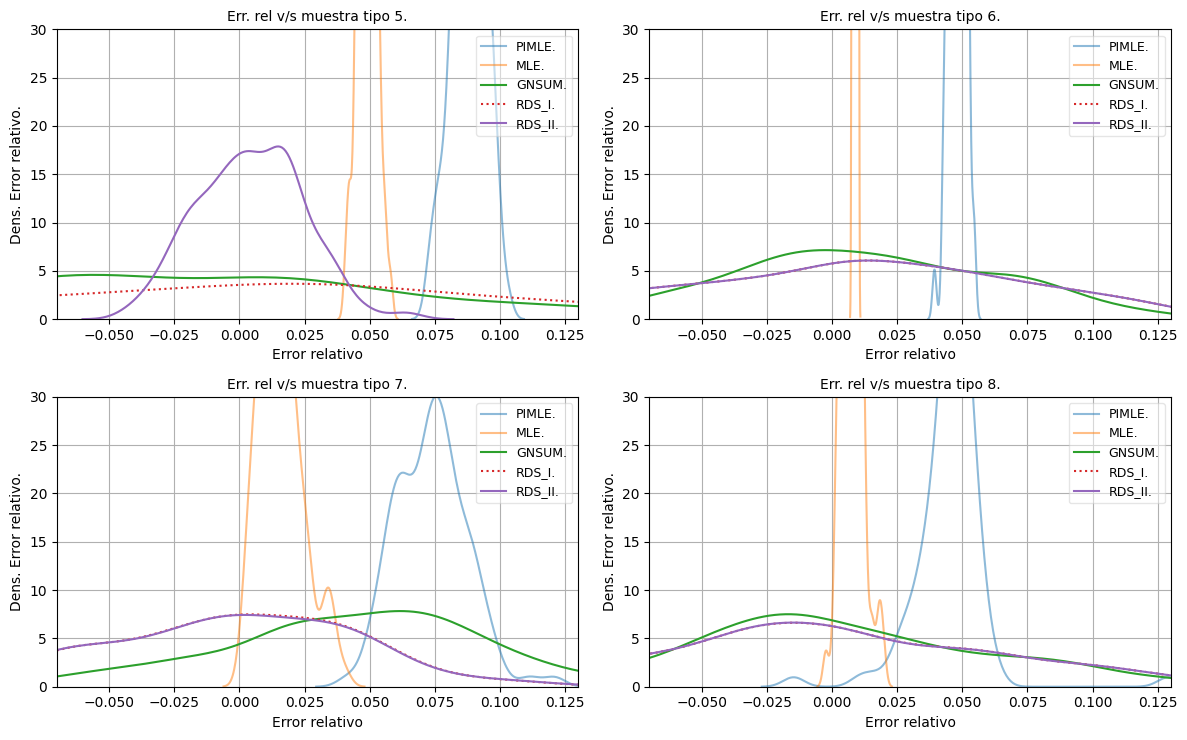

In [26]:
size_figure=(12,15/2) # variable 3
Tipo_sample_p_gral=['5','6','7','8'] # variable 1
L_met_est=["PIMLE", "MLE","GNSUM","RDS_I","RDS_II"] # variable 2

delta=0.03
l_ylim=[0,30]
l_xlim=[-0.1+delta,0.1+delta]
act_legend=True

l_grupos=list(df_experimentacion["Etiqueta H"].unique())
i=2
grupo_i=l_grupos[i]
cond_grupo=df_experimentacion["Etiqueta H"]==grupo_i
df_grupo=df_experimentacion[cond_grupo]
graficar_sample_vs_ER_summarize(df_grupo,Tipo_sample_p_gral,L_met_est,size_figure,l_xlim,l_ylim,act_legend)

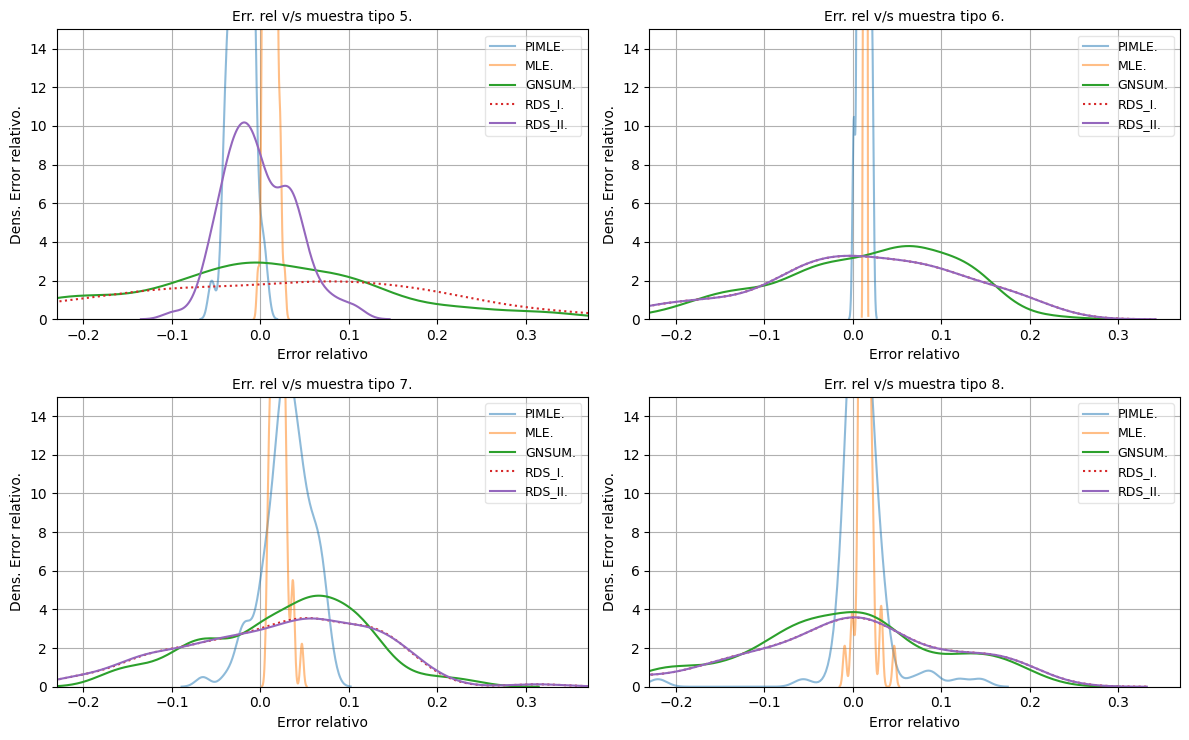

In [27]:
size_figure=(12,15/2) # variable 3
Tipo_sample_p_gral=['5','6','7','8'] # variable 1
L_met_est=["PIMLE", "MLE","GNSUM","RDS_I","RDS_II"] # variable 2

delta=0.07
l_ylim=[0,15]
l_xlim=[-0.3+delta,0.3+delta]
act_legend=True

l_grupos=list(df_experimentacion["Etiqueta H"].unique())
i=3
grupo_i=l_grupos[i]
cond_grupo=df_experimentacion["Etiqueta H"]==grupo_i
df_grupo=df_experimentacion[cond_grupo]
graficar_sample_vs_ER_summarize(df_grupo,Tipo_sample_p_gral,L_met_est,size_figure,l_xlim,l_ylim,act_legend)

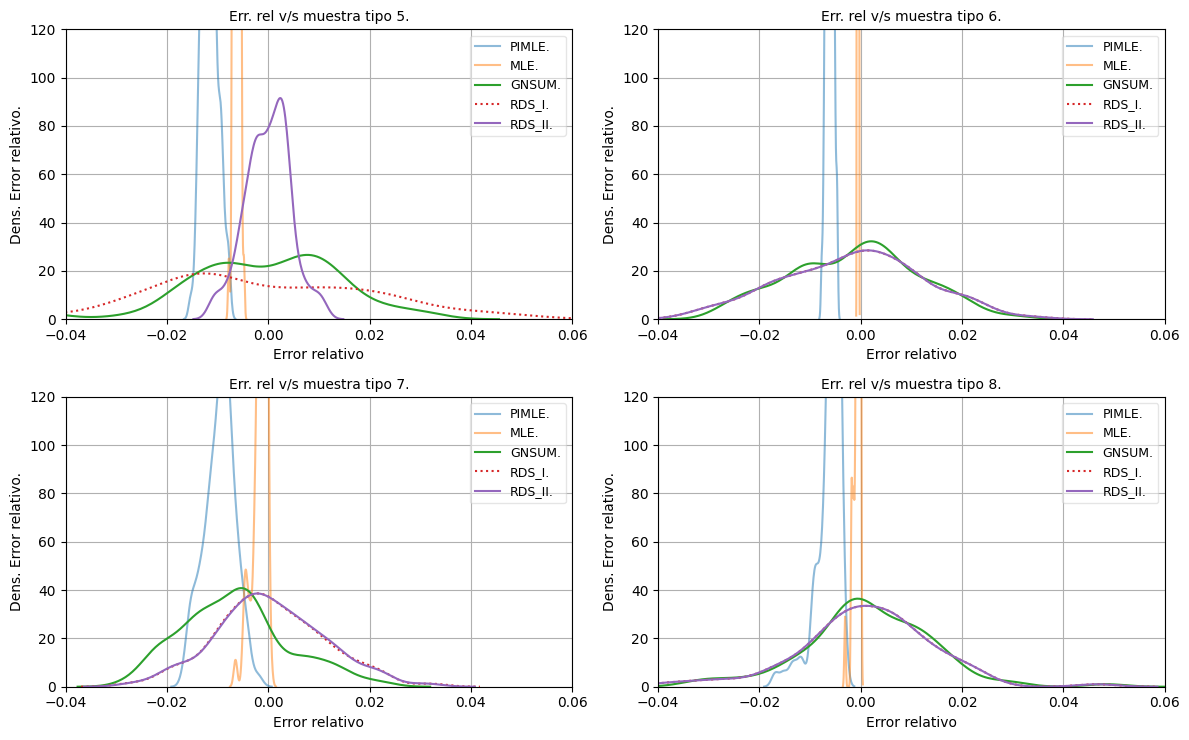

In [28]:
size_figure=(12,15/2) # variable 3
Tipo_sample_p_gral=['5','6','7','8'] # variable 1
L_met_est=["PIMLE", "MLE","GNSUM","RDS_I","RDS_II"] # variable 2

delta=0.06
l_ylim=[0,120]
l_xlim=[-0.1+delta,0+delta]
act_legend=True

l_grupos=list(df_experimentacion["Etiqueta H"].unique())
i=4
grupo_i=l_grupos[i]
cond_grupo=df_experimentacion["Etiqueta H"]==grupo_i
df_grupo=df_experimentacion[cond_grupo]
graficar_sample_vs_ER_summarize(df_grupo,Tipo_sample_p_gral,L_met_est,size_figure,l_xlim,l_ylim,act_legend)

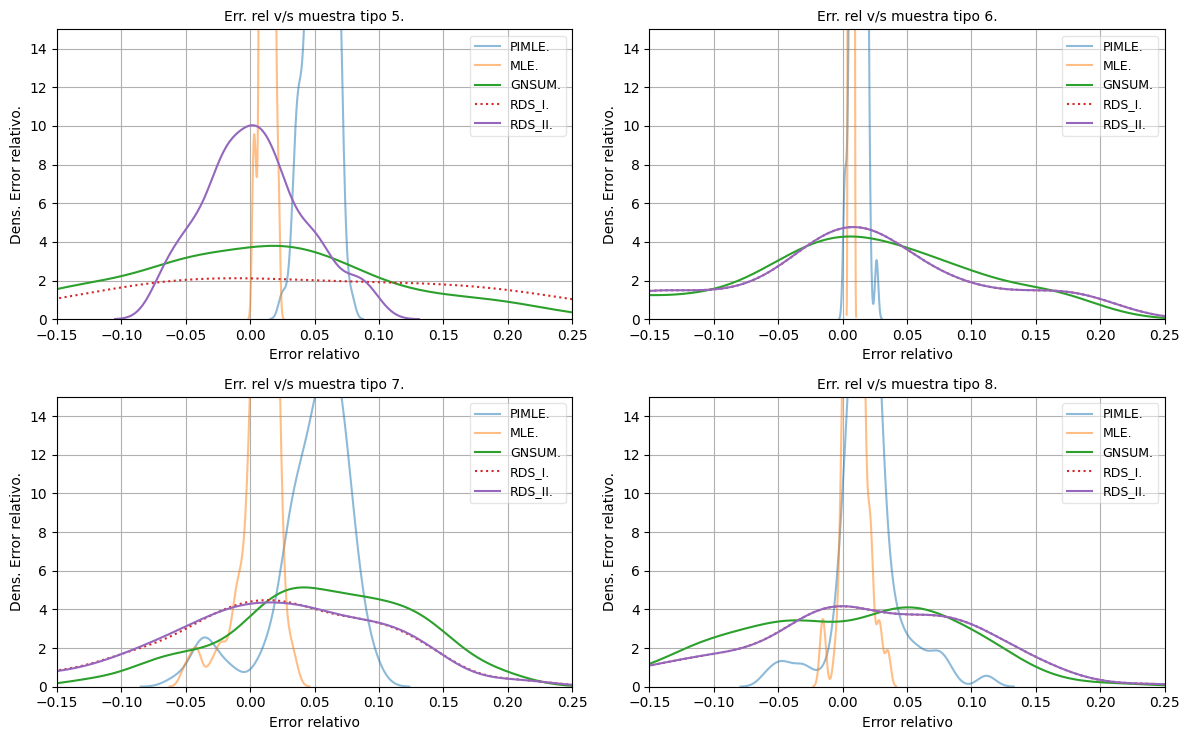

In [29]:
size_figure=(12,15/2) # variable 3
Tipo_sample_p_gral=['5','6','7','8'] # variable 1
L_met_est=["PIMLE", "MLE","GNSUM","RDS_I","RDS_II"] # variable 2

delta=0.05
l_ylim=[0,15]
l_xlim=[-0.2+delta,0.2+delta]
act_legend=True

l_grupos=list(df_experimentacion["Etiqueta H"].unique())
i=5
grupo_i=l_grupos[i]
cond_grupo=df_experimentacion["Etiqueta H"]==grupo_i
df_grupo=df_experimentacion[cond_grupo]
graficar_sample_vs_ER_summarize(df_grupo,Tipo_sample_p_gral,L_met_est,size_figure,l_xlim,l_ylim,act_legend)

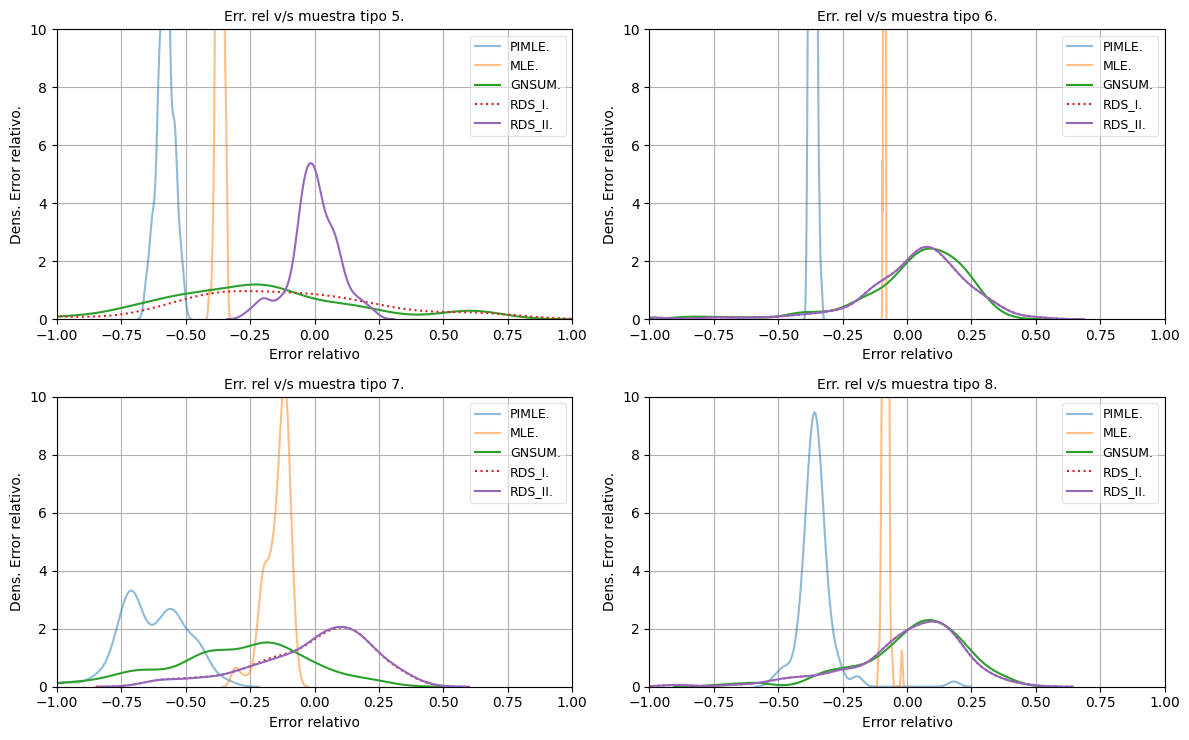

In [30]:
size_figure=(12,15/2) # variable 3
Tipo_sample_p_gral=['5','6','7','8'] # variable 1
L_met_est=["PIMLE", "MLE","GNSUM","RDS_I","RDS_II"] # variable 2
l_ylim=[0,10]
l_xlim=[-1,1]
act_legend=True

l_grupos=list(df_experimentacion["Etiqueta H"].unique())
i=6
grupo_i=l_grupos[i]
cond_grupo=df_experimentacion["Etiqueta H"]==grupo_i
df_grupo=df_experimentacion[cond_grupo]
graficar_sample_vs_ER_summarize(df_grupo,Tipo_sample_p_gral,L_met_est,size_figure,l_xlim,l_ylim,act_legend)

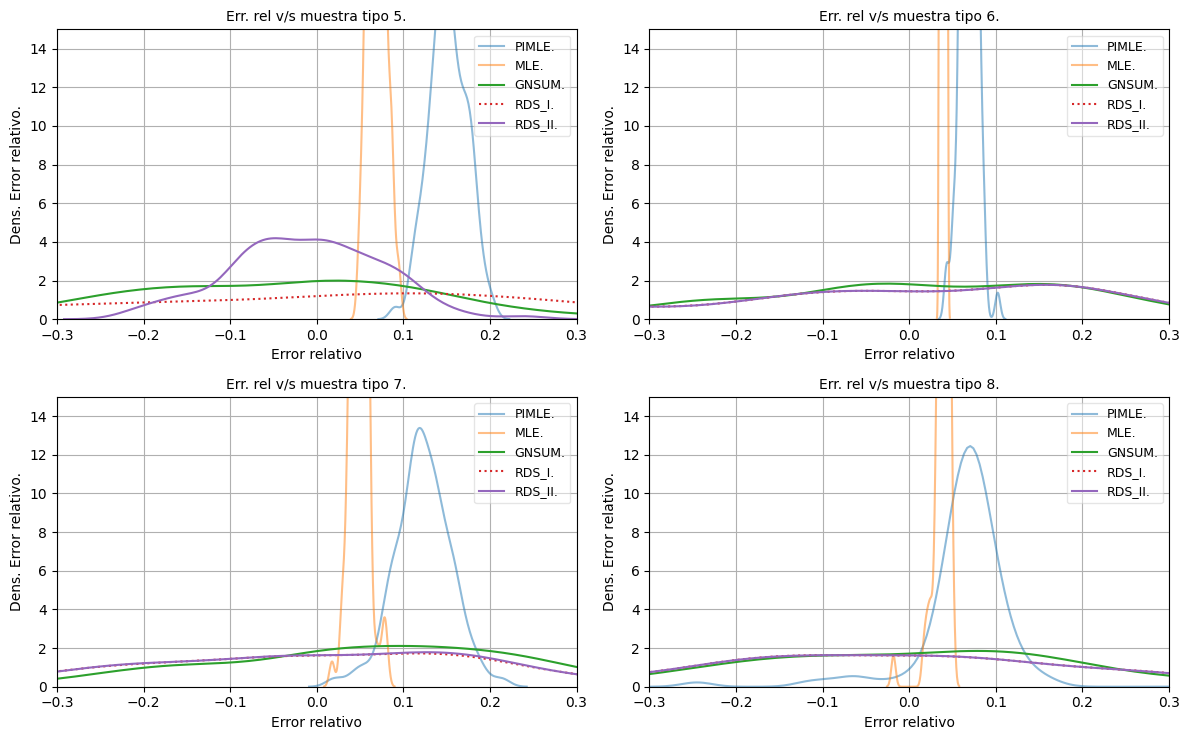

In [31]:
size_figure=(12,15/2) # variable 3
Tipo_sample_p_gral=['5','6','7','8'] # variable 1
L_met_est=["PIMLE", "MLE","GNSUM","RDS_I","RDS_II"] # variable 2

l_ylim=[0,15]
l_xlim=[-0.3,0.3]
act_legend=True

l_grupos=list(df_experimentacion["Etiqueta H"].unique())
i=7
grupo_i=l_grupos[i]
cond_grupo=df_experimentacion["Etiqueta H"]==grupo_i
df_grupo=df_experimentacion[cond_grupo]
graficar_sample_vs_ER_summarize(df_grupo,Tipo_sample_p_gral,L_met_est,size_figure,l_xlim,l_ylim,act_legend)